In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# Loading Modules
import warnings; warnings.simplefilter('ignore')
from IPython.core.display import display, HTML

sns.set(style="ticks", color_codes=True)

In [2]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Algorithms for Base Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Load Data & Data Exploration

In [4]:
df = pd.read_csv('telco_churn_data.csv')
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [5]:
# melihat info dari tiap kolom dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [6]:
# melihat ukuran baris x kolom dataset
df.shape

(7043, 46)

In [7]:
# cek jumlah nilai null tiap kolom
df.isnull().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

[note] kolom churn kategory, churn reason, customer satisfaction didrop saja

In [8]:
# melihat baris yang duplikasi jika ada
df.duplicated().sum()

0

# Data Preprocessing

In [9]:
churn = df.copy()

# Data transformation
churn.insert(30, 'Middle Citizen', np.where((churn['Age']>=30) & (churn['Age']<65), "Yes", "No"))

# rename kolom tabel
churn = churn.rename(columns={'Under 30':'Junior Citizen'})

# drop column
churn.drop(['Age','Zip Code','Latitude','Longitude','Churn Category','Churn Reason','Customer Satisfaction','City','Population'], axis=1, inplace=True)

# additional drop column 
churn.drop(['Customer ID','Offer'], axis=1, inplace=True)

# change value in churn value column with yes/no
#churn['Churn Value'] = churn['Churn Value'].map({1:'Yes', 0:'No'})

churn.head()

,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,...,Junior Citizen,Middle Citizen,Senior Citizen,Married,Dependents,Number of Dependents,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,No,0,1,No,0.00,No,Yes,Fiber Optic,9,No,...,No,No,Yes,No,No,0,1,5433,5,0
1,Yes,1,8,Yes,48.85,Yes,Yes,Cable,19,No,...,No,No,Yes,Yes,Yes,1,1,5302,5,0
2,No,0,18,Yes,11.33,Yes,Yes,Fiber Optic,57,No,...,No,No,Yes,No,Yes,3,1,3179,1,0
3,Yes,1,25,Yes,19.76,No,Yes,Fiber Optic,13,No,...,No,No,Yes,Yes,Yes,1,1,5337,1,1
4,Yes,1,37,Yes,6.33,Yes,Yes,Cable,15,No,...,No,No,Yes,Yes,Yes,1,1,2793,1,0


In [10]:
# cek nilai null 
churn.isnull().sum()

Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Gender                   

In [11]:
# change datatype object to category
for col in churn.columns:
  if churn[col].dtype == 'object':
    churn[col] = churn[col].astype('category')

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Referred a Friend                  7043 non-null   category
 1   Number of Referrals                7043 non-null   int64   
 2   Tenure in Months                   7043 non-null   int64   
 3   Phone Service                      7043 non-null   category
 4   Avg Monthly Long Distance Charges  7043 non-null   float64 
 5   Multiple Lines                     7043 non-null   category
 6   Internet Service                   7043 non-null   category
 7   Internet Type                      7043 non-null   category
 8   Avg Monthly GB Download            7043 non-null   int64   
 9   Online Security                    7043 non-null   category
 10  Online Backup                      7043 non-null   category
 11  Device Protection Plan             7043 non

# EDA | Exploratory Data Analysis

In [12]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

## Customer Distribution

count     7043
unique       2
top       Male
freq      3555
Name: Gender, dtype: object
mode:  0    Male
Name: Gender, dtype: category
Categories (2, object): ['Female', 'Male']
Male      3555
Female    3488
Name: Gender, dtype: int64


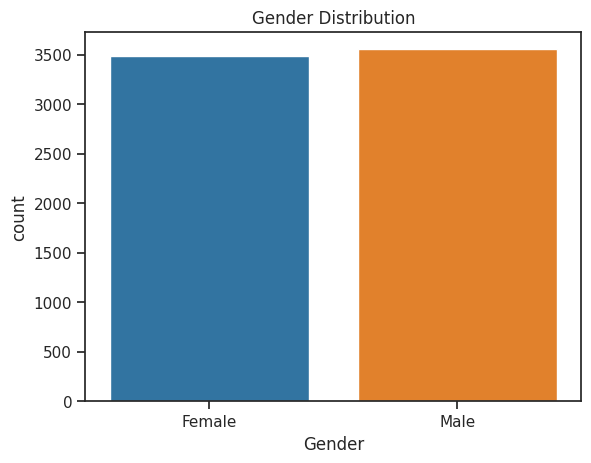

In [13]:
# Feature Variable: Gender
palette = ['tab:blue', 'tab:orange','tab:green','tab:red']
plt.title('Gender Distribution')
categorical_summarized(churn, x = 'Gender', palette=palette)

[Text(0.5, 1.0, 'Contract by Churn Value Distribution')]

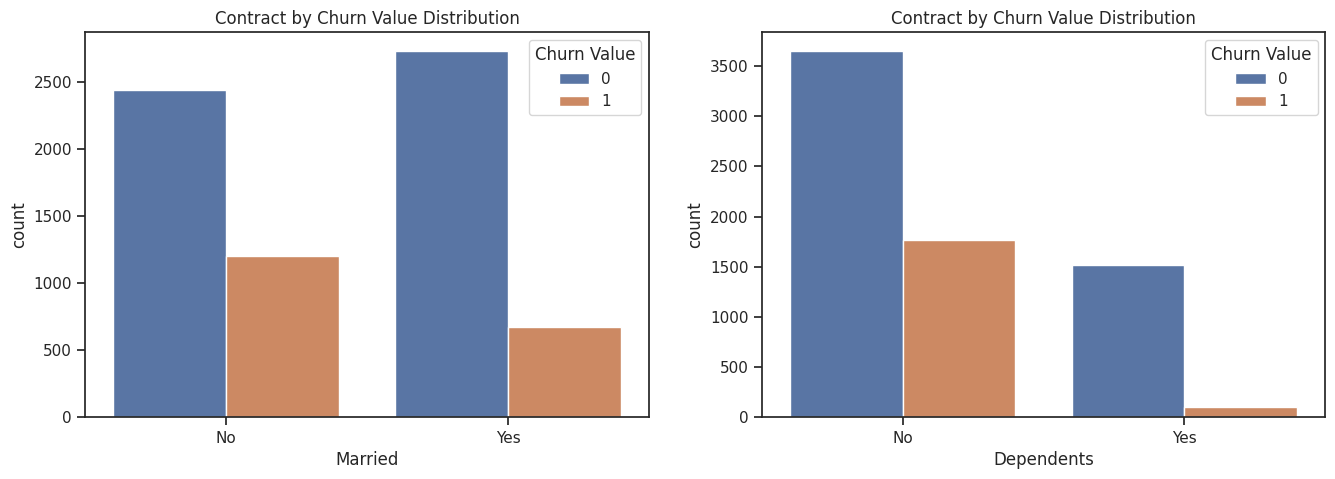

In [14]:
# Married & Dependents by Churn Value
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.countplot(x="Married", hue="Churn Value", data=churn, ax=axes[0]).set(title='Contract by Churn Value Distribution')
sns.countplot(x="Dependents", hue="Churn Value", data=churn, ax=axes[1]).set(title='Contract by Churn Value Distribution')

## Churn Distribution

count    7043.000000
mean        0.265370
std         0.441561
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn Value, dtype: float64
mode:  0    0
Name: Churn Value, dtype: int64
0    5174
1    1869
Name: Churn Value, dtype: int64


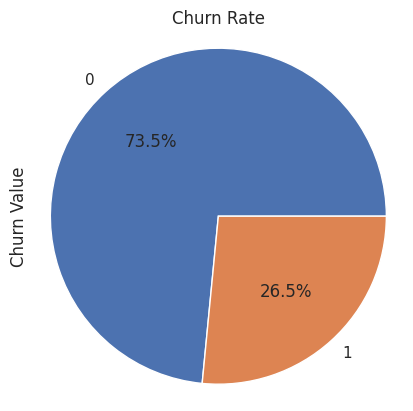

In [15]:
# Distribution of churn value
series = churn['Churn Value']
print(series.describe())
print('mode: ', series.mode())
print('='*80)
print(series.value_counts())

churn['Churn Value'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('scaled')
plt.title('Churn Rate')
plt.show()

<Axes: title={'center': 'Distribution of Gender by Monthly Charge'}, xlabel='Monthly Charge', ylabel='Gender'>

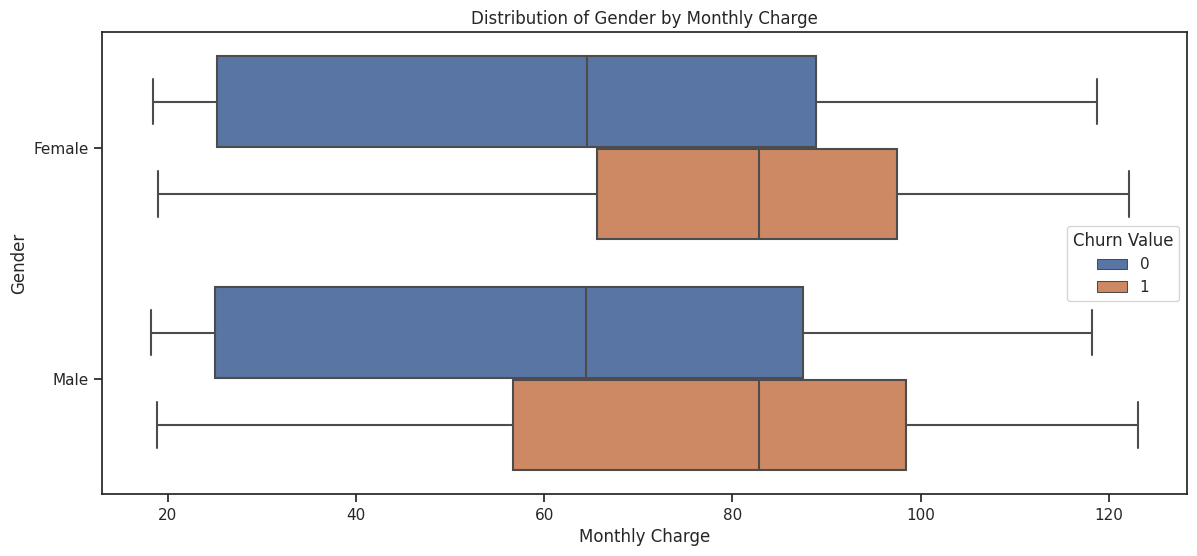

In [16]:
# Gender,Monthly Charge by Churn Value
fig, ax = plt.subplots(figsize=(14,6))
plt.title('Distribution of Gender by Monthly Charge')
sns.boxplot(data=churn, x='Monthly Charge', y='Gender', hue='Churn Value')

## Account Distribution

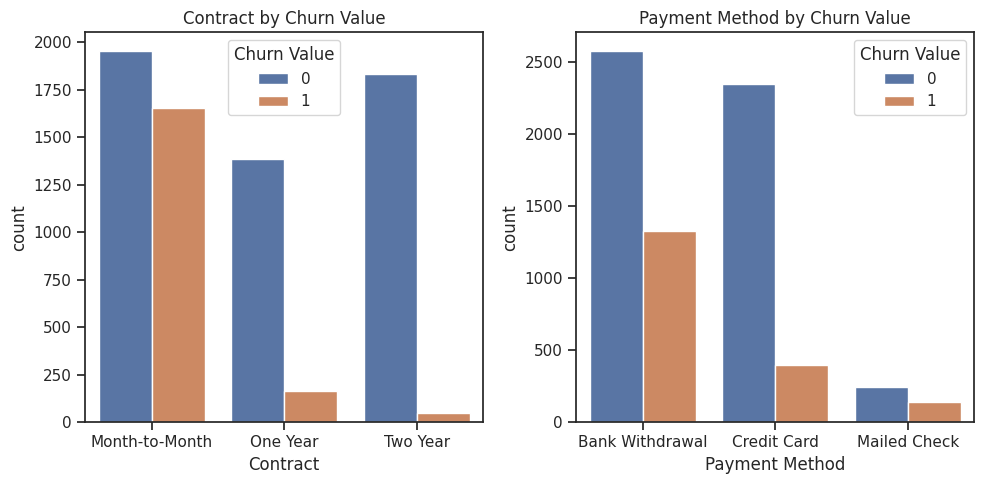

In [17]:
# distribution of contract, payment method by churn value
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.countplot(x="Contract", hue="Churn Value", data=churn, ax=axes[0]).set(title='Contract by Churn Value')
sns.countplot(x="Payment Method", hue="Churn Value", data=churn, ax=axes[1]).set(title='Payment Method by Churn Value')
        
plt.tight_layout()
plt.show()

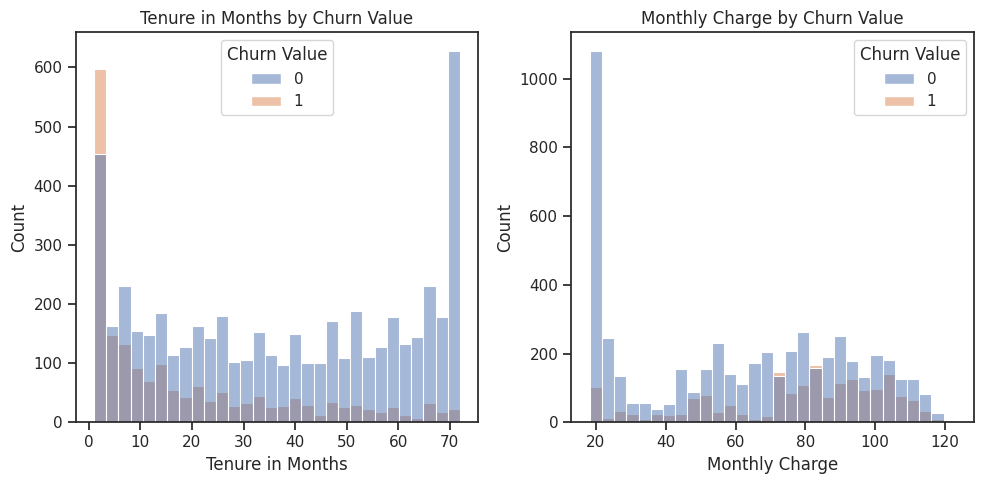

In [18]:
# distribution of tenure in month & monthly charge by churn value
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.histplot(data=churn, x="Tenure in Months", hue='Churn Value', bins=30, ax=axes[0]).set(title='Tenure in Months by Churn Value')
sns.histplot(data=churn, x="Monthly Charge", hue='Churn Value', bins=30, ax=axes[1]).set(title='Monthly Charge by Churn Value')

plt.tight_layout()
plt.show()

In [19]:
print(churn['Monthly Charge'].describe())

count    7043.000000
mean       65.538800
std        30.606805
min        18.250000
25%        35.890000
50%        71.968000
75%        90.650000
max       123.084000
Name: Monthly Charge, dtype: float64


## menjawab problem statement

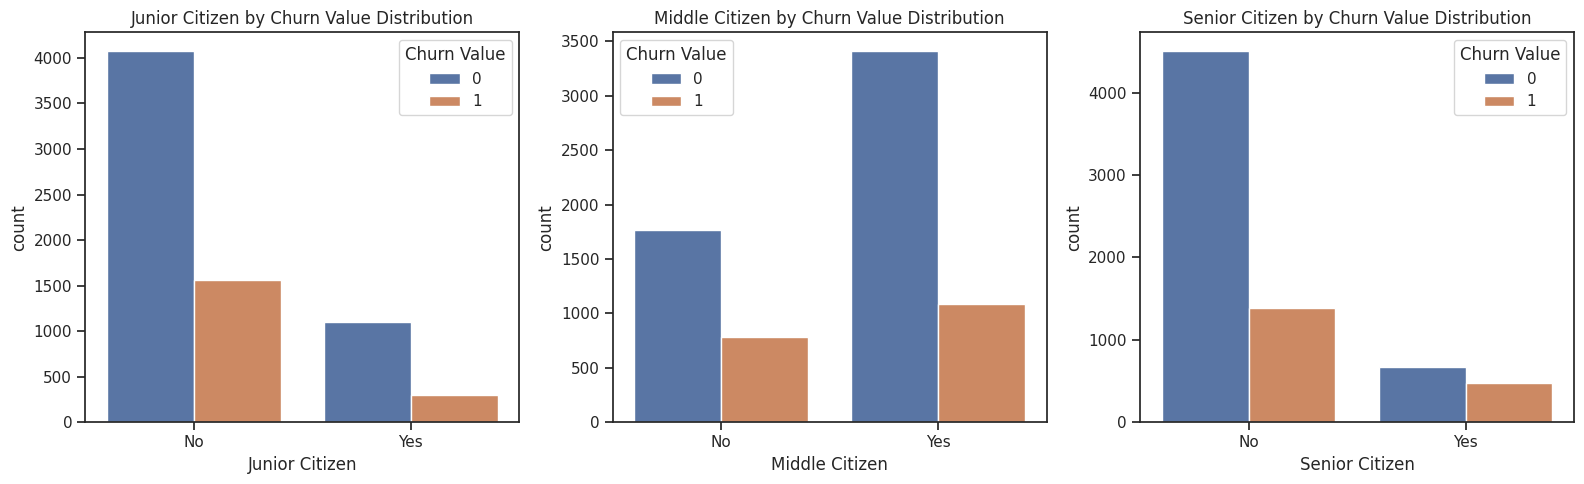

In [20]:
# distribution of contract, payment method, internet type by churn value
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

sns.countplot(x="Junior Citizen", hue="Churn Value", data=churn, ax=axes[0]).set(title='Junior Citizen by Churn Value Distribution')
sns.countplot(x="Middle Citizen", hue="Churn Value", data=churn, ax=axes[1]).set(title='Middle Citizen by Churn Value Distribution')
sns.countplot(x="Senior Citizen", hue="Churn Value", data=churn, ax=axes[2]).set(title='Senior Citizen by Churn Value Distribution')
        
plt.tight_layout()
plt.show()

count     7043
unique       2
top        Yes
freq      6361
Name: Phone Service, dtype: object
mode:  0    Yes
Name: Phone Service, dtype: category
Categories (2, object): ['No', 'Yes']
Yes    6361
No      682
Name: Phone Service, dtype: int64


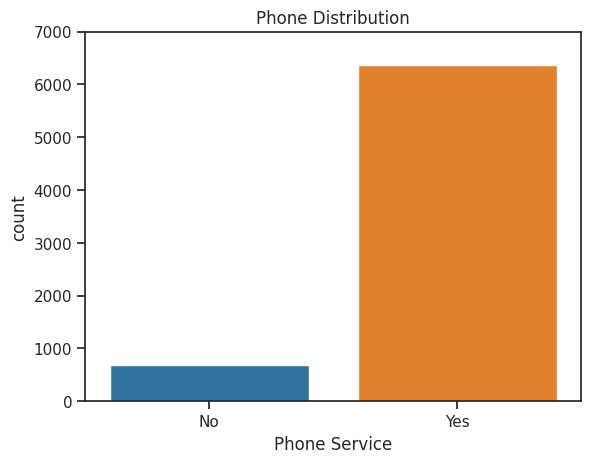

In [21]:
# Feature Variable: Phone Service
palette = ['tab:blue', 'tab:orange','tab:green','tab:red']
plt.title('Phone Distribution')
plt.ylim(0, 7000)
categorical_summarized(churn, x = 'Phone Service', palette=palette)

count     7043
unique       2
top        Yes
freq      5517
Name: Internet Service, dtype: object
mode:  0    Yes
Name: Internet Service, dtype: category
Categories (2, object): ['No', 'Yes']
Yes    5517
No     1526
Name: Internet Service, dtype: int64


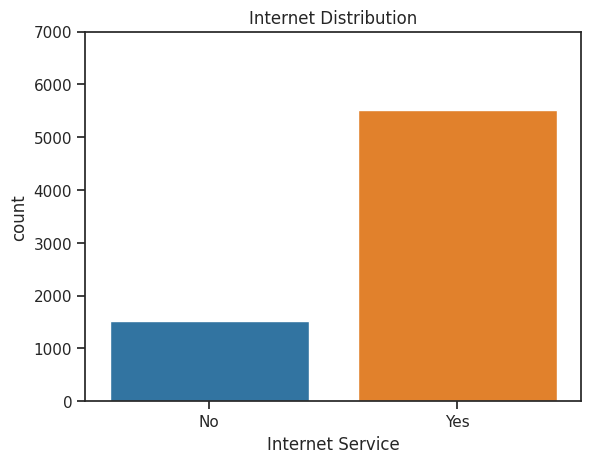

In [22]:
# Feature Variable: Internet Service
palette = ['tab:blue', 'tab:orange','tab:green','tab:red']
plt.title('Internet Distribution')
plt.ylim(0, 7000)
categorical_summarized(churn, x = 'Internet Service', palette=palette)

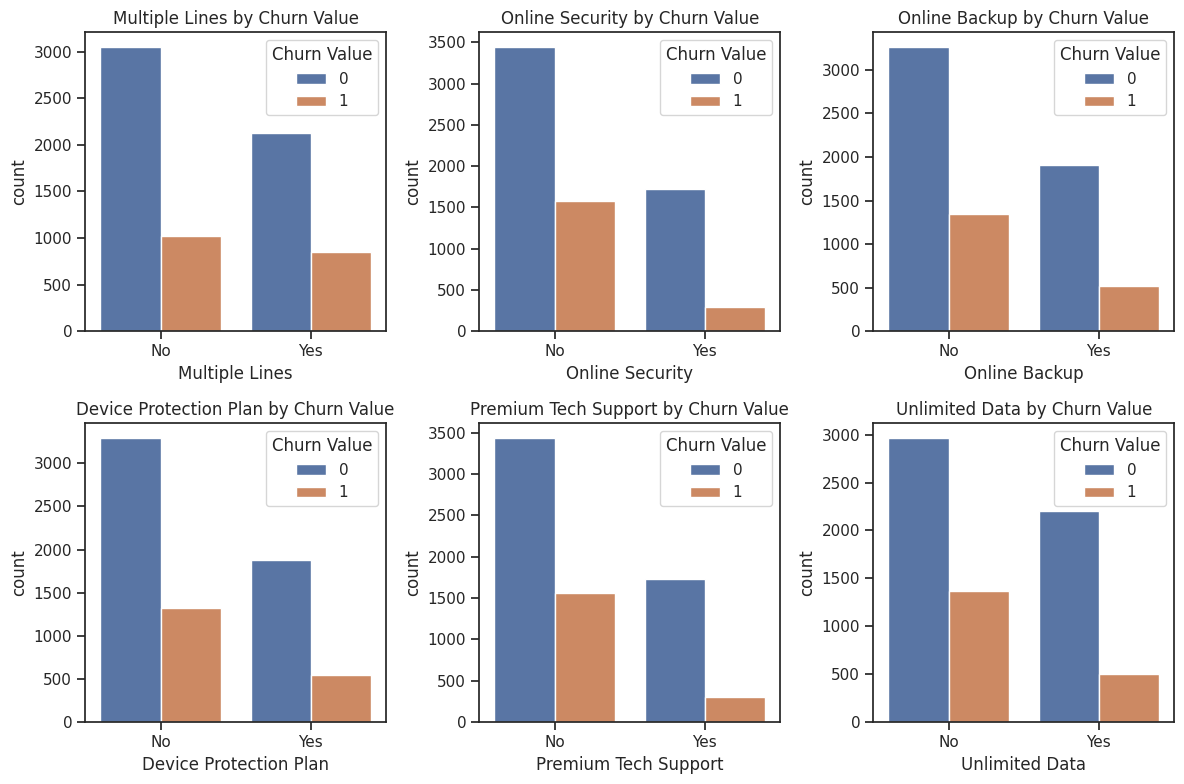

In [23]:
# extra service distribution by churn value
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

sns.countplot(x='Multiple Lines', hue="Churn Value", data=churn, ax=axes[0,0]).set(title='Multiple Lines by Churn Value')
sns.countplot(x='Online Security', hue="Churn Value", data=churn, ax=axes[0,1]).set(title='Online Security by Churn Value')
sns.countplot(x='Online Backup', hue="Churn Value", data=churn, ax=axes[0,2]).set(title='Online Backup by Churn Value')
sns.countplot(x='Device Protection Plan', hue="Churn Value", data=churn, ax=axes[1,0]).set(title='Device Protection Plan by Churn Value')
sns.countplot(x='Premium Tech Support', hue="Churn Value", data=churn, ax=axes[1,1]).set(title='Premium Tech Support by Churn Value')
sns.countplot(x='Unlimited Data', hue="Churn Value", data=churn, ax=axes[1,2]).set(title='Unlimited Data by Churn Value')
        
plt.tight_layout()
plt.show()

## Correlation metrix

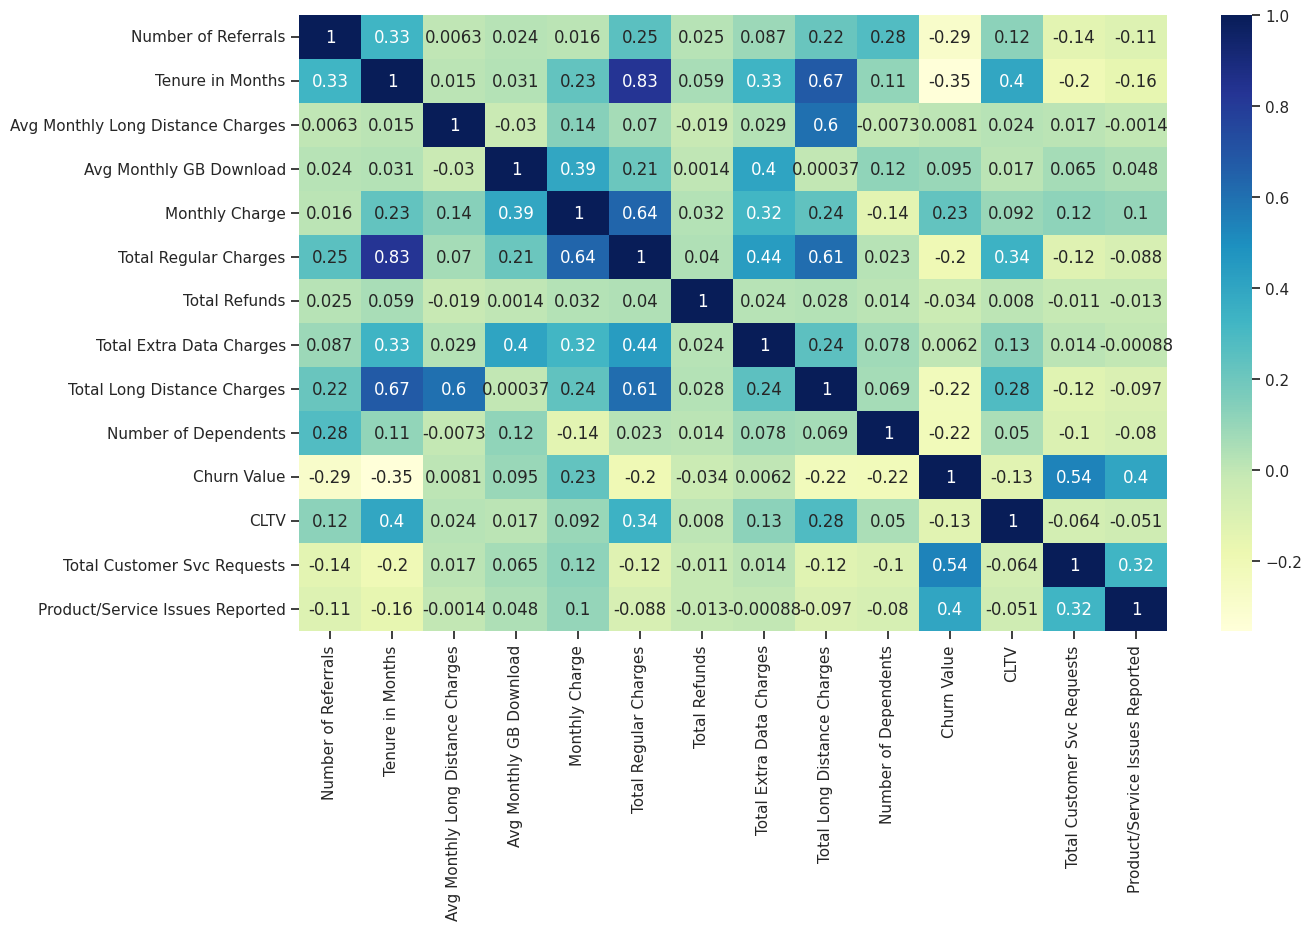

In [24]:
# plot heatmap korelasi antar kolom
figure, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(churn.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

# Modelling

## Preprocessing

### Feeature Importances Using Random Forest

Hasil Feature Importances dataframe churn 20 teratas.

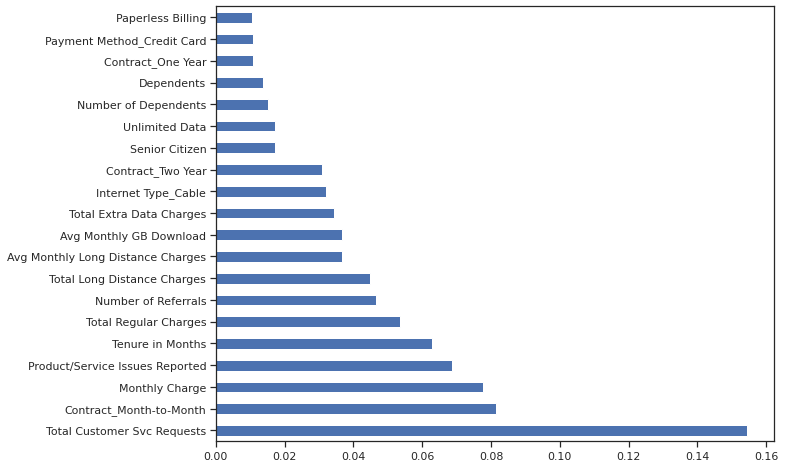

Akan digunakan sebanyak 13 Feature Importance karena memiliki score yang cukup tinggi.

### Feature Selection

In [64]:
# Define X for feature and y for label
feature = ['Total Customer Svc Requests','Contract','Monthly Charge','Product/Service Issues Reported','Tenure in Months','Total Regular Charges','Number of Referrals',
           'Total Long Distance Charges','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Total Extra Data Charges','Internet Type']
X = churn[feature]
y = churn['Churn Value']

In [65]:
# Change value in Churn Value into Yes and No
y.replace(to_replace=[1,0], value=['Yes','No'],inplace=True)

In [66]:
X

,Total Customer Svc Requests,Contract,Monthly Charge,Product/Service Issues Reported,Tenure in Months,Total Regular Charges,Number of Referrals,Total Long Distance Charges,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Total Extra Data Charges,Internet Type
0,5,Month-to-Month,41.236,0,1,39.65,0,0.00,0.00,9,0.0,Fiber Optic
1,5,Month-to-Month,83.876,0,8,633.30,1,390.80,48.85,19,120.0,Cable
2,1,Month-to-Month,99.268,0,18,1752.55,0,203.94,11.33,57,0.0,Fiber Optic
3,1,Month-to-Month,102.440,1,25,2514.50,1,494.00,19.76,13,327.0,Fiber Optic
4,1,Month-to-Month,79.560,0,37,2868.15,1,234.21,6.33,15,430.0,Cable
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Two Year,21.150,0,72,1419.40,0,1639.44,22.77,0,0.0,None
7039,2,One Year,84.800,0,24,1990.50,1,865.20,36.05,24,0.0,DSL
7040,2,One Year,103.200,0,72,7362.90,4,2135.52,29.66,59,4344.0,Cable
7041,0,Month-to-Month,29.600,0,11,346.45,1,0.00,0.00,17,0.0,DSL


In [67]:
y

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
7038     No
7039     No
7040     No
7041     No
7042     No
Name: Churn Value, Length: 7043, dtype: object

### Split Data Train Test

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape, y_train.shape )
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5634, 12) (5634,)
Test set: (1409, 12) (1409,)


### One Hot Encoding & Transformation

In [69]:
X_train = pd.concat([ X_train.drop(['Internet Type','Contract'], axis=1), pd.get_dummies(X_train[['Internet Type','Contract']]) ], axis=1)
X_test = pd.concat([ X_test.drop(['Internet Type','Contract'], axis=1), pd.get_dummies(X_test[['Internet Type','Contract']]) ], axis=1)

In [70]:
X_train.drop(['Internet Type_DSL','Internet Type_Fiber Optic','Internet Type_None','Contract_One Year'], axis=1, inplace=True)
X_test.drop(['Internet Type_DSL','Internet Type_Fiber Optic','Internet Type_None','Contract_One Year'], axis=1, inplace=True)

In [71]:
X_train.head()

,Total Customer Svc Requests,Monthly Charge,Product/Service Issues Reported,Tenure in Months,Total Regular Charges,Number of Referrals,Total Long Distance Charges,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Total Extra Data Charges,Internet Type_Cable,Contract_Month-to-Month,Contract_Two Year
2920,3,90.350,0,51,4614.55,0,469.71,9.21,30,1384.00,0,0,0
2966,1,24.850,0,22,493.40,0,505.34,22.97,0,0.00,0,1,0
6099,1,86.150,1,67,5883.85,1,214.40,3.20,23,135.33,0,0,1
5482,1,20.550,0,72,1432.55,5,2671.92,37.11,0,0.00,0,0,1
2012,3,60.944,1,15,939.70,0,221.85,14.79,65,611.00,1,1,0


In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2920 to 2732
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total Customer Svc Requests        5634 non-null   int64  
 1   Monthly Charge                     5634 non-null   float64
 2   Product/Service Issues Reported    5634 non-null   int64  
 3   Tenure in Months                   5634 non-null   int64  
 4   Total Regular Charges              5634 non-null   float64
 5   Number of Referrals                5634 non-null   int64  
 6   Total Long Distance Charges        5634 non-null   float64
 7   Avg Monthly Long Distance Charges  5634 non-null   float64
 8   Avg Monthly GB Download            5634 non-null   int64  
 9   Total Extra Data Charges           5634 non-null   float64
 10  Internet Type_Cable                5634 non-null   uint8  
 11  Contract_Month-to-Month            5634 non-null   ui

In [73]:
# function to change datatype into category
def change_to_category(dataframe):
  for col in dataframe.columns:
    if dataframe[col].dtype == 'uint8':
      dataframe[col] = dataframe[col].astype('category')

In [74]:
change_to_category(X_train)
change_to_category(X_test)

### Normalize Data

In [75]:
X_train= preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)

## Classification

### K Nearest Neighbor(KNN)

In [76]:
from sklearn import metrics

#Find the optimal k

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.84811923, 0.86444287, 0.86515259, 0.86728176, 0.86728176,
       0.87579844, 0.87650816, 0.88431512, 0.88502484])

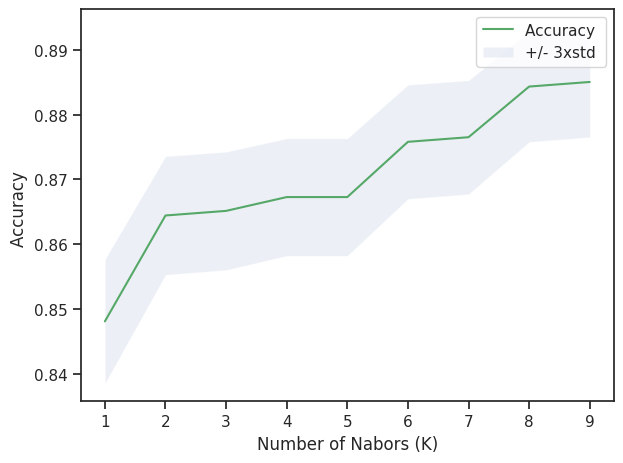

In [77]:
#Plot accuracy for different k Values

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [78]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8850248403122782 with k= 9


In [79]:
k = 9
#Train Model and Predict  
KNN_1 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNN_1

KNeighborsClassifier(n_neighbors=9)

In [80]:
pred_train = KNN_1.predict(X_train)
pred_test = KNN_1.predict(X_test)

In [81]:
print('Predict Test')
print('-------------------------------------------------------')
print(metrics.accuracy_score(y_test, pred_test)*100)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))
print('Predict Train')
print('-------------------------------------------------------')
print(metrics.accuracy_score(y_train, pred_train)*100)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))


Predict Test
-------------------------------------------------------
88.50248403122782
[[981  55]
 [107 266]]
              precision    recall  f1-score   support

          No       0.90      0.95      0.92      1036
         Yes       0.83      0.71      0.77       373

    accuracy                           0.89      1409
   macro avg       0.87      0.83      0.85      1409
weighted avg       0.88      0.89      0.88      1409

Predict Train
-------------------------------------------------------
90.20234291799787
[[3964  174]
 [ 378 1118]]
              precision    recall  f1-score   support

          No       0.91      0.96      0.93      4138
         Yes       0.87      0.75      0.80      1496

    accuracy                           0.90      5634
   macro avg       0.89      0.85      0.87      5634
weighted avg       0.90      0.90      0.90      5634



### Decision Tree

In [82]:
#Modelling ("entropy" or "gini")
decisiontree = DecisionTreeClassifier(criterion="gini", max_depth = 4)
decisiontree # it shows the default parameters

DecisionTreeClassifier(max_depth=4)

In [83]:
#Fitting the data X and y
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [84]:
pred_train = decisiontree.predict(X_train)
pred_test = decisiontree.predict(X_test)

In [85]:
print('Predict Test')
print('-------------------------------------------------------')
print(metrics.accuracy_score(y_test, pred_test)*100)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))
print('Predict Train')
print('-------------------------------------------------------')
print(metrics.accuracy_score(y_train, pred_train)*100)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Predict Test
-------------------------------------------------------
86.5152590489709
[[987  49]
 [141 232]]
              precision    recall  f1-score   support

          No       0.88      0.95      0.91      1036
         Yes       0.83      0.62      0.71       373

    accuracy                           0.87      1409
   macro avg       0.85      0.79      0.81      1409
weighted avg       0.86      0.87      0.86      1409

Predict Train
-------------------------------------------------------
86.9542066027689
[[3994  144]
 [ 591  905]]
              precision    recall  f1-score   support

          No       0.87      0.97      0.92      4138
         Yes       0.86      0.60      0.71      1496

    accuracy                           0.87      5634
   macro avg       0.87      0.79      0.81      5634
weighted avg       0.87      0.87      0.86      5634



In [86]:
from sklearn import datasets
from sklearn import tree
import matplotlib as mpl

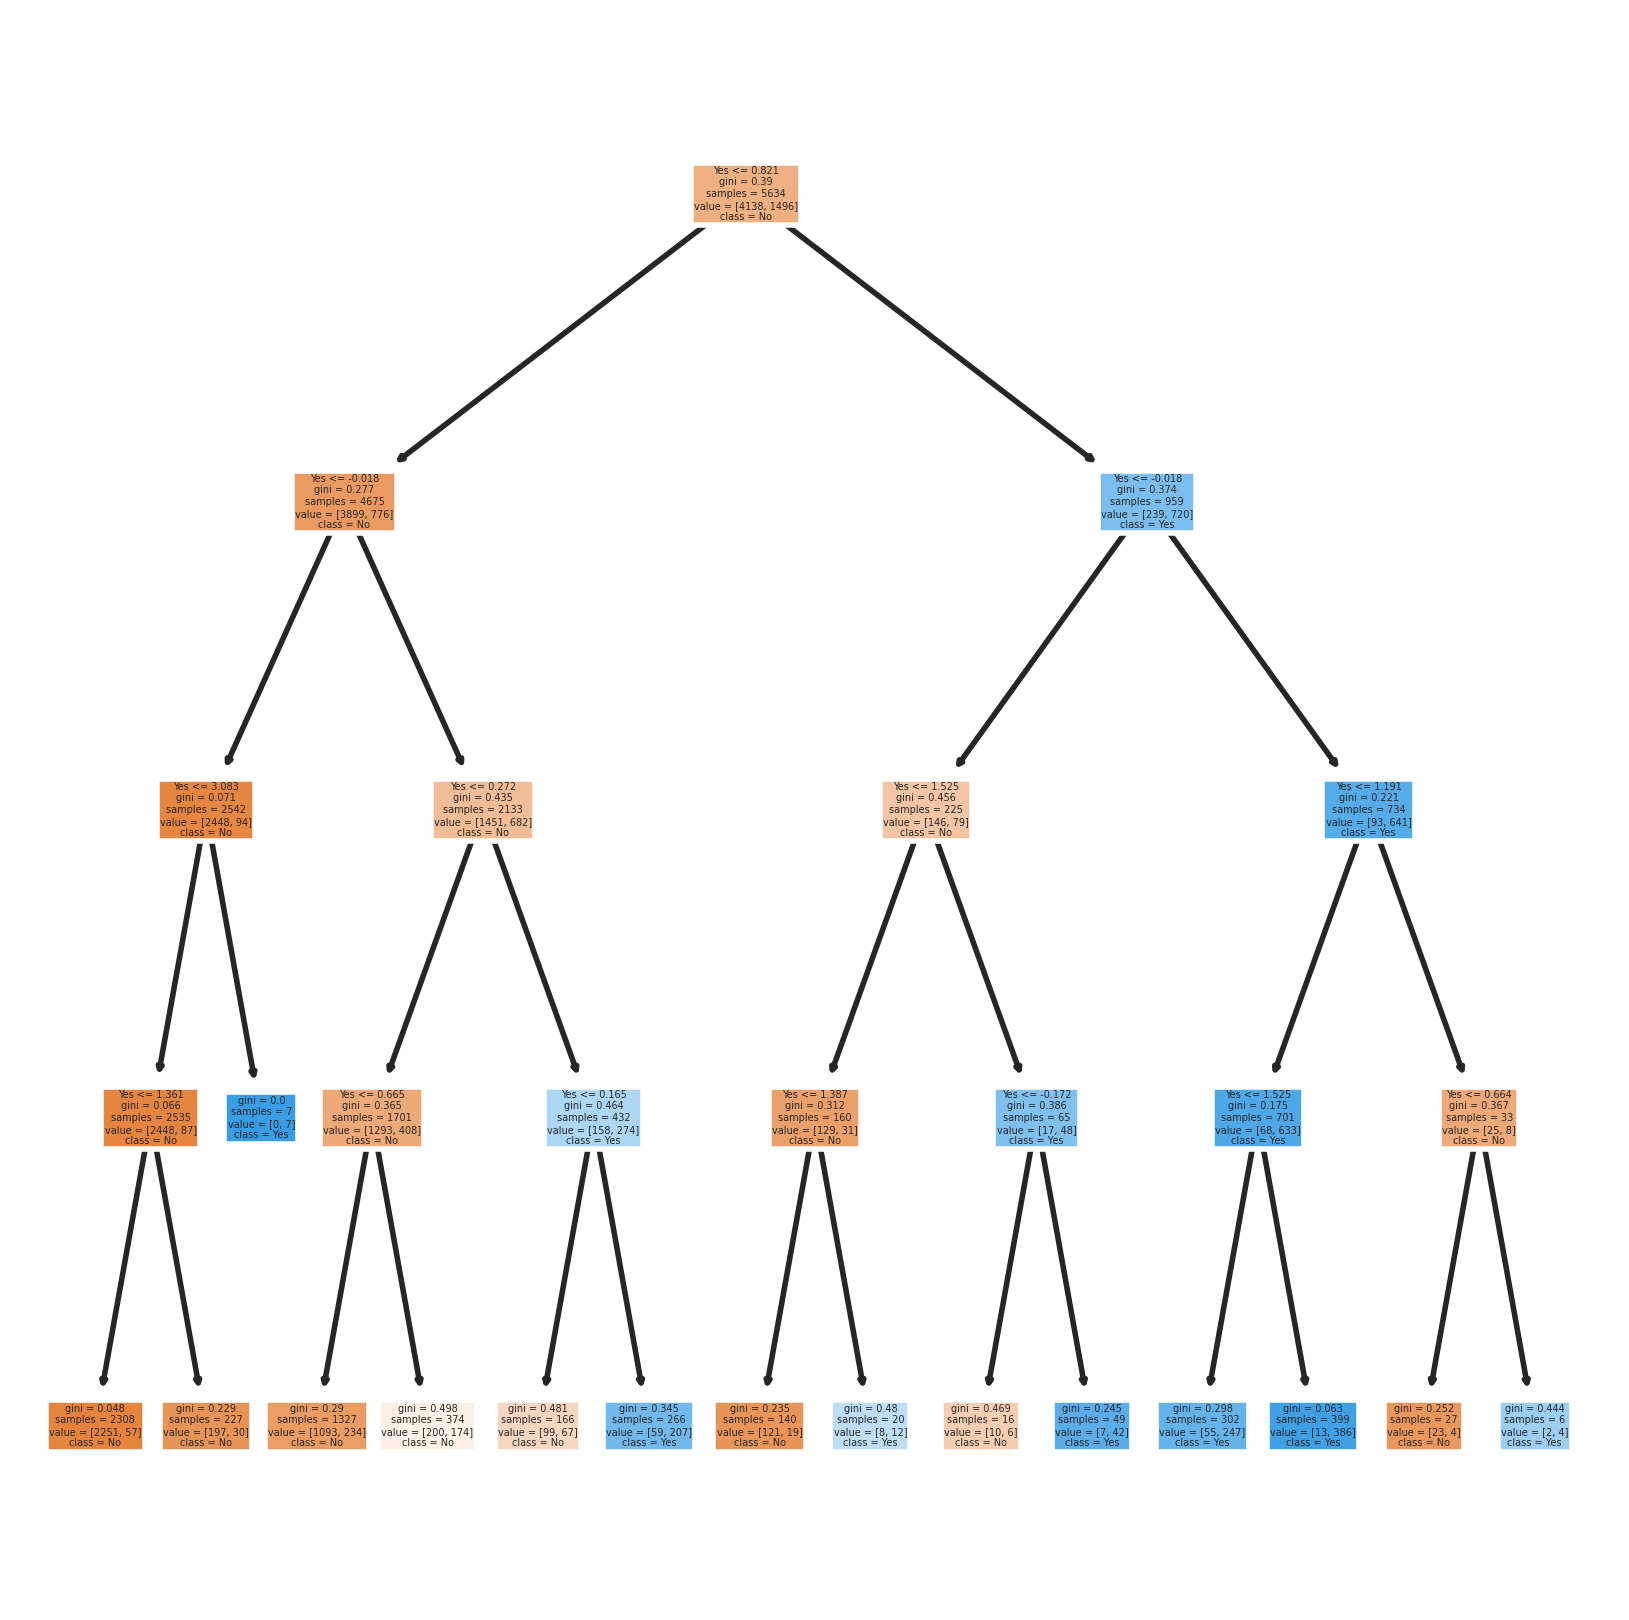

In [87]:
cn=['No', 'Yes']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=400)

tree.plot_tree(decisiontree,
           feature_names = y, 
           class_names=cn,
           filled = True);

### Support Vector Machine

In [88]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train) 

SVC()

In [89]:
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

In [90]:
print('Predict Test')
print('-------------------------------------------------------')
print(metrics.accuracy_score(y_test, pred_test)*100)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))
print('Predict Train')
print('-------------------------------------------------------')
print(metrics.accuracy_score(y_train, pred_train)*100)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))


Predict Test
-------------------------------------------------------
90.13484740951029
[[997  39]
 [100 273]]
              precision    recall  f1-score   support

          No       0.91      0.96      0.93      1036
         Yes       0.88      0.73      0.80       373

    accuracy                           0.90      1409
   macro avg       0.89      0.85      0.87      1409
weighted avg       0.90      0.90      0.90      1409

Predict Train
-------------------------------------------------------
90.34433794817181
[[3990  148]
 [ 396 1100]]
              precision    recall  f1-score   support

          No       0.91      0.96      0.94      4138
         Yes       0.88      0.74      0.80      1496

    accuracy                           0.90      5634
   macro avg       0.90      0.85      0.87      5634
weighted avg       0.90      0.90      0.90      5634



### Logistic Regression

In [91]:
#Modelling
LR = LogisticRegression(C=0.01, solver='liblinear', class_weight='balanced').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight='balanced', solver='liblinear')

In [92]:
pred_train = LR.predict(X_train)
pred_test = LR.predict(X_test)

In [93]:
print('Predict Test')
print('-------------------------------------------------------')
print(metrics.accuracy_score(y_test, pred_test)*100)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))
print('Predict Train')
print('-------------------------------------------------------')
print(metrics.accuracy_score(y_train, pred_train)*100)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Predict Test
-------------------------------------------------------
84.74095102909865
[[868 168]
 [ 47 326]]
              precision    recall  f1-score   support

          No       0.95      0.84      0.89      1036
         Yes       0.66      0.87      0.75       373

    accuracy                           0.85      1409
   macro avg       0.80      0.86      0.82      1409
weighted avg       0.87      0.85      0.85      1409

Predict Train
-------------------------------------------------------
85.4632587859425
[[3506  632]
 [ 187 1309]]
              precision    recall  f1-score   support

          No       0.95      0.85      0.90      4138
         Yes       0.67      0.88      0.76      1496

    accuracy                           0.85      5634
   macro avg       0.81      0.86      0.83      5634
weighted avg       0.88      0.85      0.86      5634



### Gaussian NB

In [94]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [95]:
pred_train = nb.predict(X_train)
pred_test = nb.predict(X_test)

In [96]:
print('Predict Test')
print('-------------------------------------------------------')
print(metrics.accuracy_score(y_test, pred_test)*100)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))
print('Predict Train')
print('-------------------------------------------------------')
print(metrics.accuracy_score(y_train, pred_train)*100)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Predict Test
-------------------------------------------------------
77.85663591199432
[[768 268]
 [ 44 329]]
              precision    recall  f1-score   support

          No       0.95      0.74      0.83      1036
         Yes       0.55      0.88      0.68       373

    accuracy                           0.78      1409
   macro avg       0.75      0.81      0.75      1409
weighted avg       0.84      0.78      0.79      1409

Predict Train
-------------------------------------------------------
78.66524671636492
[[3105 1033]
 [ 169 1327]]
              precision    recall  f1-score   support

          No       0.95      0.75      0.84      4138
         Yes       0.56      0.89      0.69      1496

    accuracy                           0.79      5634
   macro avg       0.76      0.82      0.76      5634
weighted avg       0.85      0.79      0.80      5634



### Random Forest Classifier

In [97]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

In [98]:
print('Predict Test')
print('-------------------------------------------------------')
print(metrics.accuracy_score(y_test, pred_test)*100)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))
print('Predict Train')
print('-------------------------------------------------------')
print(metrics.accuracy_score(y_train, pred_train)*100)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Predict Test
-------------------------------------------------------
88.78637331440738
[[975  61]
 [ 97 276]]
              precision    recall  f1-score   support

          No       0.91      0.94      0.93      1036
         Yes       0.82      0.74      0.78       373

    accuracy                           0.89      1409
   macro avg       0.86      0.84      0.85      1409
weighted avg       0.89      0.89      0.89      1409

Predict Train
-------------------------------------------------------
100.0
[[4138    0]
 [   0 1496]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      4138
         Yes       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



### Gradient Boosting Classifier

In [99]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

pred_train = gb.predict(X_train)
pred_test = gb.predict(X_test)

In [100]:
print('Predict Test')
print('-------------------------------------------------------')
print(metrics.accuracy_score(y_test, pred_test)*100)
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))
print('Predict Train')
print('-------------------------------------------------------')
print(metrics.accuracy_score(y_train, pred_train)*100)
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Predict Test
-------------------------------------------------------
90.56068133427964
[[995  41]
 [ 92 281]]
              precision    recall  f1-score   support

          No       0.92      0.96      0.94      1036
         Yes       0.87      0.75      0.81       373

    accuracy                           0.91      1409
   macro avg       0.89      0.86      0.87      1409
weighted avg       0.90      0.91      0.90      1409

Predict Train
-------------------------------------------------------
92.72275470358538
[[4012  126]
 [ 284 1212]]
              precision    recall  f1-score   support

          No       0.93      0.97      0.95      4138
         Yes       0.91      0.81      0.86      1496

    accuracy                           0.93      5634
   macro avg       0.92      0.89      0.90      5634
weighted avg       0.93      0.93      0.93      5634

